This notebook quantifies the impact on BC on the nested domain (d02) on the PM2.5 over Delhi

In [1]:
import xarray as xr
import numpy as np       
import warnings
import pandas as pd
import salem

warnings.filterwarnings('ignore')

shp='/exports/csce/datastore/geos/users/s1878599/phd_work/DelhiNCT/gadm_data/delhiNCT/delhiNCT.shp'

In [2]:

ds_nobc=xr.open_mfdataset('/exports/geos.ed.ac.uk/palmer_group/managed/s1878599/delhiAQ/delhiNCT/outputs_postmon/pblmincoeff_tests/wrfout_d01_2019-10-*_00:00:00_no_bc.nc')
ds=xr.open_mfdataset('/exports/geos.ed.ac.uk/palmer_group/managed/s1878599/delhiAQ/delhiNCT/outputs_postmon/pblmincoeff_tests/wrfout_d01_2019-10-*_00:00:00_nest_2019_newdyno_exchmin5.nc')

In [3]:
def reset_time_dim(ds):
    """
    Time dimension in WRF-Chem datasets is just the time index [0,1,2,3...].
    This function convert dimension Time as datetime[64].
    :param ds:
     wrf-chem xarray dataset.
    :type ds:xarray.Dataset.
    :return:
     xarray.Dataset with datetime time dim.
    :rtype: xarray.Dataset.
    """
    return ds.assign_coords(Time=pd.to_datetime(ds.XTIME.values))

In [4]:
# reset time
ds_nobc=reset_time_dim(ds_nobc).sel(Time=slice('2019-10-06T00:00:00.000000000','2019-10-16T00:00:00.000000000')) # 5 days
ds=reset_time_dim(ds).sel(Time=slice('2019-10-06T00:00:00.000000000','2019-10-16T00:00:00.000000000')) # 5 days

In [5]:
# reset time, local time and discard 5 days  spinup period.
ds=reset_time_dim(ds)
ds=ds.assign_coords(Time=pd.to_datetime(ds.Time.to_index().tz_localize('UTC').tz_convert('Asia/Kolkata').strftime('%Y-%m-%d %H:%M:%S')))
ds.XTIME.values=ds.Time.values
ds=ds.sel(Time=slice('2019-10-06T00:00:00.000000000','2019-10-14T23:30:00.000000000'))  # discad spinup

In [6]:
ds_nobc=reset_time_dim(ds_nobc)
ds_nobc=ds_nobc.assign_coords(Time=pd.to_datetime(ds_nobc.Time.to_index().tz_localize('UTC').tz_convert('Asia/Kolkata').strftime('%Y-%m-%d %H:%M:%S')))
ds_nobc.XTIME.values=ds_nobc.Time.values
ds_nobc=ds_nobc.sel(Time=slice('2019-10-06T00:00:00.000000000','2019-10-14T23:30:00.000000000'))  # discad spinup

In [7]:
# get delhi data only
ds= ds.salem.roi(shape=shp)
ds_nobc=ds_nobc.salem.roi(shape=shp)

In [8]:
((ds_nobc.PM2_5_DRY - ds.PM2_5_DRY)/ds.PM2_5_DRY).mean(['Time','south_north','west_east'])[0].values

array(-0.46305552, dtype=float32)

In [9]:
((ds_nobc.PM2_5_DRY - ds.PM2_5_DRY)).mean(['Time','south_north','west_east'])[0].values

array(-38.683342, dtype=float32)

In [10]:
# 24h average mean
ds_nobc=ds_nobc.resample(Time='1D').mean(dim='Time')
ds=ds.resample(Time='1D').mean(dim='Time')

In [11]:
((ds_nobc.PM2_5_DRY - ds.PM2_5_DRY)).mean(['Time','south_north','west_east'])[0].values

array(-38.628014, dtype=float32)

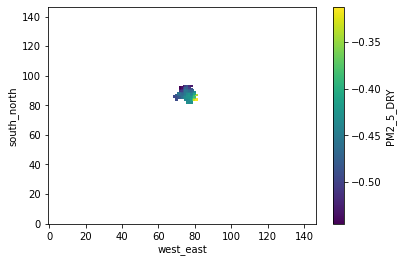

In [12]:
((ds_nobc.PM2_5_DRY - ds.PM2_5_DRY)/ds.PM2_5_DRY).mean(['Time'])[0].plot()